In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_name0 = "collective_attack.csv"
current_folder = os.getcwd()
csv_file_path0 = os.path.join(current_folder, file_name0)

df_collective = pd.read_csv(csv_file_path0)
display(df_collective.head())

,eps,optimal_theta,R,h_XZ,h_XY,h_Fe
0,1.000000e-08,3.141589,0.500000,1.000000,2.798934e-07,1.000000
1,5.050515e-03,3.141589,0.459048,0.963896,4.580009e-02,0.985452
2,1.010102e-02,3.141589,0.427930,0.937322,8.146209e-02,0.970954
3,1.515152e-02,3.141589,0.400412,0.914098,1.132744e-01,0.956505
4,2.020203e-02,3.141589,0.375186,0.892945,1.425734e-01,0.942108


In [3]:
file_name1 = "individual_attack.csv"
csv_file_path1 = os.path.join(current_folder, file_name1)

df_individual = pd.read_csv(csv_file_path1)
display(df_individual.head())

,eps,optimal_theta,R,h_XZ,h_XY,h_Fe
0,1.000000e-08,3.141589,0.500000,1.000000,2.798934e-07,1.000000
1,5.050515e-03,3.141589,0.469826,0.985452,4.580009e-02,0.985452
2,1.010102e-02,3.141589,0.444746,0.970954,8.146209e-02,0.970954
3,1.515152e-02,3.141589,0.421616,0.956505,1.132744e-01,0.956505
4,2.020203e-02,3.141589,0.399767,0.942108,1.425734e-01,0.942108


In [4]:
# Manually compare data
eps = 0.065
tolerance = 0.005
result_in = df_individual[(df_individual['eps'] >= eps - tolerance) & (df_individual['eps'] <= eps + tolerance)]
result_cl = df_collective[(df_collective['eps'] >= eps - tolerance) & (df_collective['eps'] <= eps + tolerance)]

r_cl = result_cl['R'].values[0]
r_in = result_in['R'].values[0]
theta_cl = result_cl['optimal_theta'].values[0]
theta_in = result_in['optimal_theta'].values[0]
print(f"Collective: R = {r_cl}, opitmal theta = {theta_cl}")
print(f"Individual: R = {r_in}, opitmal theta = {theta_in}")

Collective: R = 0.2141221095174736, opitmal theta = 3.14158803712113
Individual: R = 0.2494980454385033, opitmal theta = 3.141588818637015


In [5]:
# Extract values
eps_values = df_collective["eps"].values
h_XY = df_collective["h_XY"].values
h_Fe = df_collective["h_Fe"].values

theta_cl = df_collective["optimal_theta"].values
theta_in = df_individual["optimal_theta"].values

R_cl = df_collective["R"].values
R_in = df_individual["R"].values

h_XZ_cl = df_collective["h_XZ"].values
h_XZ_in = df_individual["h_XZ"].values

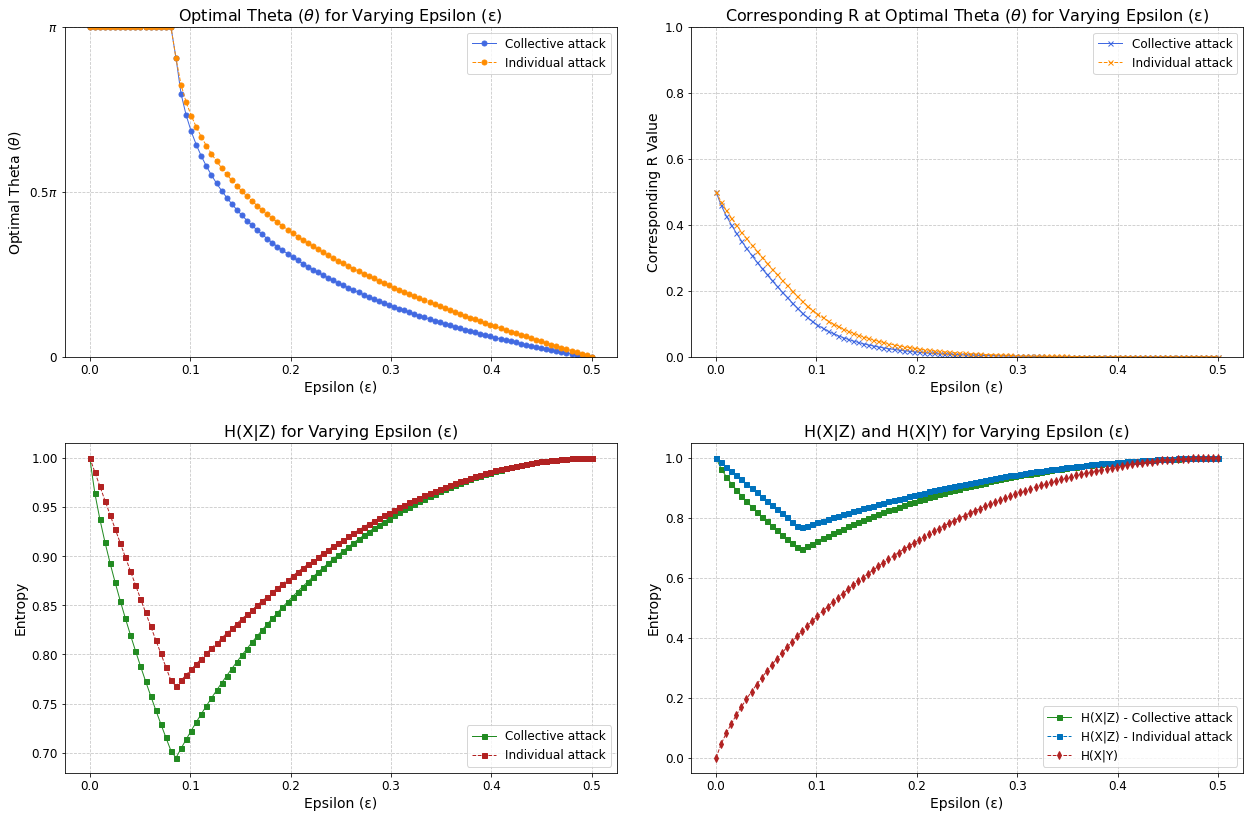

In [9]:
# Plot
plt.figure(figsize=(18, 12)) 

# Plot for Optimal Theta
plt.subplot(2, 2, 1)
plt.plot(eps_values, theta_cl, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=1, label='Collective attack')
plt.plot(eps_values, theta_in, marker='o', linestyle='--', color='darkorange', markersize=5, linewidth=1, label='Individual attack')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel(r'Optimal Theta ($\theta$)', fontsize=14)
plt.title(r'Optimal Theta ($\theta$) for Varying Epsilon (ε)', fontsize=16)
plt.ylim(0, np.pi)
plt.yticks([0, np.pi / 2, np.pi], [r'$0$', r'$0.5{\pi}$', r'$\pi$'])
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for Corresponding R Values
plt.subplot(2, 2, 2)
plt.plot(eps_values, R_cl, marker='x', linestyle='-', color='royalblue', markersize=5, linewidth=1, label='Collective attack')
plt.plot(eps_values, R_in, marker='x', linestyle='--', color='darkorange', markersize=5, linewidth=1, label='Individual attack')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Corresponding R Value', fontsize=14)
plt.title(r'Corresponding R at Optimal Theta ($\theta$) for Varying Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for H(X|Z)
plt.subplot(2, 2, 3)
plt.plot(eps_values, h_XZ_cl, marker='s', linestyle='-', color='forestgreen', markersize=5, linewidth=1, label='Collective attack')
plt.plot(eps_values, h_XZ_in, marker='s', linestyle='--', color='firebrick', markersize=5, linewidth=1, label='Individual attack')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) for Varying Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot for H(X|Y) and H(X|Z)
plt.subplot(2, 2, 4)
plt.plot(eps_values, h_XZ_cl, marker='s', linestyle='-', color='forestgreen', markersize=5, linewidth=1, label='H(X|Z) - Collective attack')
plt.plot(eps_values, h_XZ_in, marker='s', linestyle='--', color='#0072BD', markersize=5, linewidth=1, label='H(X|Z) - Individual attack')
plt.plot(eps_values, h_XY, marker='d', linestyle='--', color='firebrick', markersize=5, linewidth=1, label='H(X|Y)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) and H(X|Y) for Varying Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot
plt.tight_layout(pad=3.0)
plt.show()

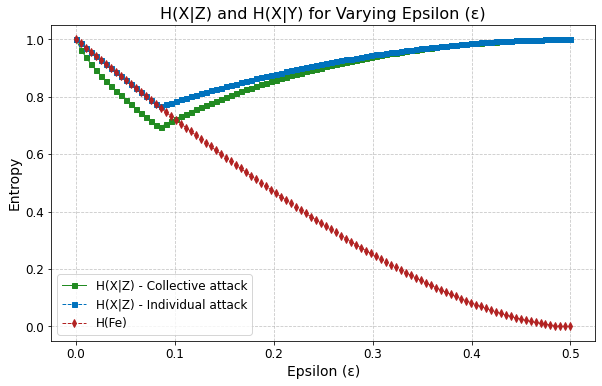

In [7]:
# Plot for h(Fe)
plt.figure(figsize=(9, 6)) 
plt.plot(eps_values, h_XZ_cl, marker='s', linestyle='-', color='forestgreen', markersize=5, linewidth=1, label='H(X|Z) - Collective attack')
plt.plot(eps_values, h_XZ_in, marker='s', linestyle='--', color='#0072BD', markersize=5, linewidth=1, label='H(X|Z) - Individual attack')
plt.plot(eps_values, h_Fe, marker='d', linestyle='--', color='firebrick', markersize=5, linewidth=1, label='H(Fe)')
plt.xlabel('Epsilon (ε)', fontsize=14)
plt.ylabel('Entropy', fontsize=14)
plt.title('H(X|Z) and H(X|Y) for Varying Epsilon (ε)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout(pad=3.0)
plt.show()